# Euler's integration

We are going to look at how Euler's integration performs at the integration of the 2nd order ODE governing the evolution of a planet on a circular orbit.
This problem can be simplified as two first order ODEs:

\begin{equation}
\begin{split}
\frac{\mathrm{d} x}{\mathrm{d} t}	& = u \\
\frac{\mathrm{d} u}{\mathrm{d} t}	& = - \frac{\mu}{(x^2+y^2)^{3/2}} x,
\end{split}
\end{equation}
where $x$ and $u$ are the position and velocity along the x-coordinates, while $y$ and $v$ are the position and velocity along the y-coordinates.

And Euler's integration for this system yields, using a discrete notation
\begin{equation}
\begin{split}
x_{n+1} &= x_n + u_n\Delta t \\
u_{n+1} &= u_n - \frac{\mu}{(x_n^2+y_n^2)^{3/2}} x_n \Delta t.
\end{split}
\end{equation}
Similarly, 
\begin{equation}
\begin{split}
y_{n+1} &= y_n + v_n\Delta t \\
v_{n+1} &= v_n - \frac{\mu}{(x_n^2+y_n^2)^{3/2}} y_n \Delta t.
\end{split}
\end{equation}




In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let us define the function of the exact solution (which we know !)

Here $\omega = n = \mu/a^3$, where $a$ is the semi-major axis

In [2]:
# Exact solution for the x coordinate of the position
def position_x(a, t, omega):
    return a * np.cos(omega * t)
def position_y(a, t, omega):
    return a * np.sin(omega * t)
# Exact solution for the x coordinate of the velocity
def velocity_x(a, t, omega):
    return - a * omega * np.sin(omega * t)
def velocity_y(a, t, omega):
    return a * omega * np.cos(omega * t)

Let us define the 4 derivatives

In [3]:
# Velocities for the 2 components
def dx_dt(x, y, u, v):
    return u
def dy_dt(x, y, u, v):
    return v

# Accelerations for the 2 components
def du_dt(x, y, u, v, mu):
    omega_squared = mu/np.power(x*x + y*y, 3./2.)
    return - omega_squared * x
def dv_dt(x, y, u, v, mu):
    omega_squared = mu/np.power(x*x + y*y, 3./2.)
    return - omega_squared * y

Now let us define an evolver function, which will perform the Euler integration. We want to keep in memory the solution x(t), v(t) and the time t to later plot the result and compare it to the exact solution

In [9]:
def evolve_Euler(x0, y0, u0, v0,  mu, dt, N_steps):
    xe = np.zeros((N_steps + 1))
    ue = np.zeros((N_steps + 1))
    ye = np.zeros((N_steps + 1))
    ve = np.zeros((N_steps + 1))
    te = np.zeros((N_steps + 1))

    xe[0], ye[0] = x0, y0
    ue[0], ve[0], te[0] = u0, v0, 0
    
    print("now is time to work")
    for i in range(N_steps):
        xe[i+1] = xe[i] + dx_dt(xe[i], ye[i], ue[i], ve[i])*dt
        ye[i+1] = ye[i] + dy_dt(xe[i], ye[i], ue[i], ve[i])*dt
        ue[i+1] = ue[i] + du_dt(xe[i], ye[i], ue[i], ve[i], mu)*dt
        ve[i+1] = ve[i] + dv_dt(xe[i], ye[i], ue[i], ve[i], mu)*dt
        te[i+1] = te[i] + dt
    return te, xe, ye, ue, ve

Now let's define the initial conditions.
And compute both an array with the exact solution and 2 arrays with the integration results.

In [10]:
Time_max = 10

# Initial conditions for the integration
mu = 1.0
x0, y0 = 1.0, 0.0
u0, v0 = 0.0, 1.0
dt = 0.001

N_steps = int(Time_max/float(dt))

# Computation of the Euler's integration
te, xe, ye, ue, ve = evolve_Euler(x0, y0, u0, v0,  mu, dt, N_steps)

# Computation of the exact solution
omega = np.sqrt(mu/np.power(x0*x0+y0*y0, 3./2.))

exact_solution_x  = [position_x(x0, tt, omega) for tt in te]
exact_solution_y  = [position_y(x0, tt, omega) for tt in te]
exact_solution_u  = [velocity_x(x0, tt, omega) for tt in te]
exact_solution_v  = [velocity_y(x0, tt, omega) for tt in te]


now is time to work


Now let's plot both the exact solution and the integration result

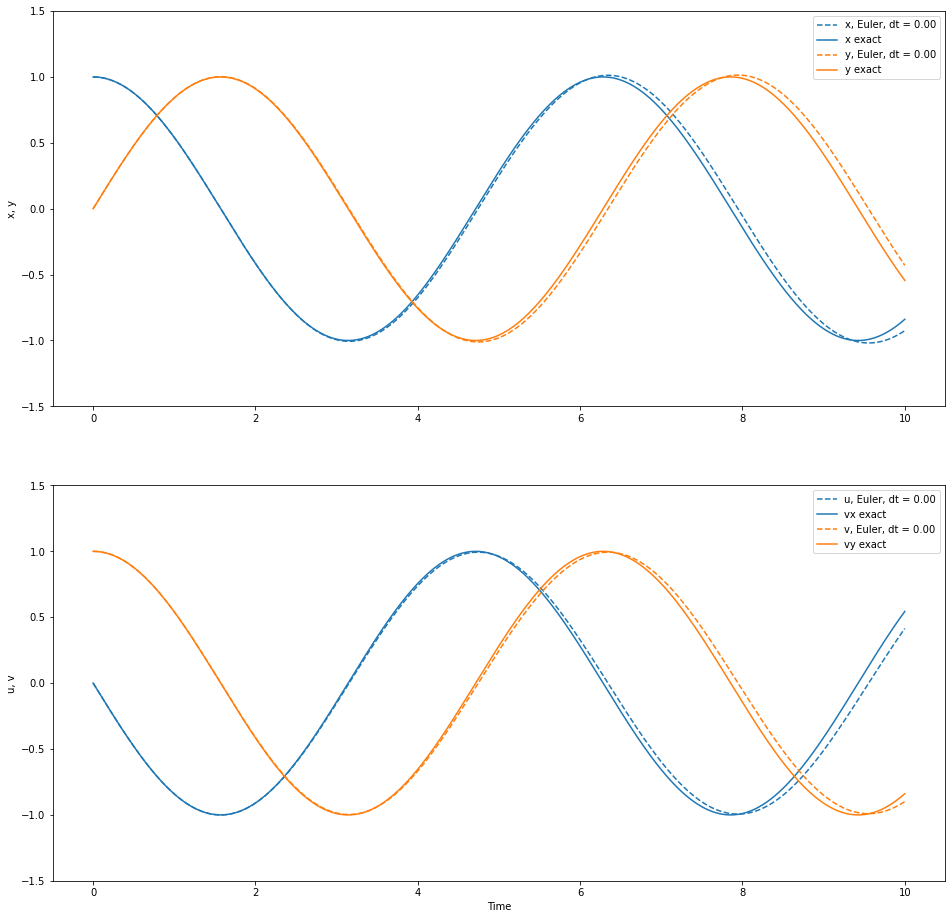

In [11]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(2,1,1)

line, = ax.plot(te, xe, '--', label="x, Euler, dt = %.2f" %dt)
ax.plot(te, exact_solution_x, '-', c=line.get_color(), label="x exact")
line, = ax.plot(te, ye, '--', label="y, Euler, dt = %.2f" %dt)
ax.plot(te, exact_solution_y, '-', c=line.get_color(), label="y exact")

ax.set_ylim([-1.5,1.5])
ax.set_ylabel("x, y")
ax.legend(loc=0, prop={'size':10})

ax = fig.add_subplot(2,1,2, sharex=ax)

line, = ax.plot(te, ue, '--', label="u, Euler, dt = %.2f" %dt)
ax.plot(te, exact_solution_u, '-', c=line.get_color(), label="vx exact")
line, = ax.plot(te, ve, '--', label="v, Euler, dt = %.2f" %dt)
ax.plot(te, exact_solution_v, '-', c=line.get_color(), label="vy exact")

ax.set_ylim([-1.5,1.5])
ax.set_ylabel("u, v")
ax.set_xlabel("Time")
ax.legend(loc=0, prop={'size':10})

Let's evolve it a bit more

In [12]:
Time_max = 100
N_steps = int(Time_max/float(dt))

# Computation of the Euler's integration
te, xe, ye, ue, ve = evolve_Euler(x0, y0, u0, v0,  mu, dt, N_steps)

# Computation of the exact solution
exact_solution_x  = [position_x(x0, tt, omega) for tt in te]
exact_solution_y  = [position_y(x0, tt, omega) for tt in te]
exact_solution_u  = [velocity_x(x0, tt, omega) for tt in te]
exact_solution_v  = [velocity_y(x0, tt, omega) for tt in te]

now is time to work


And plot

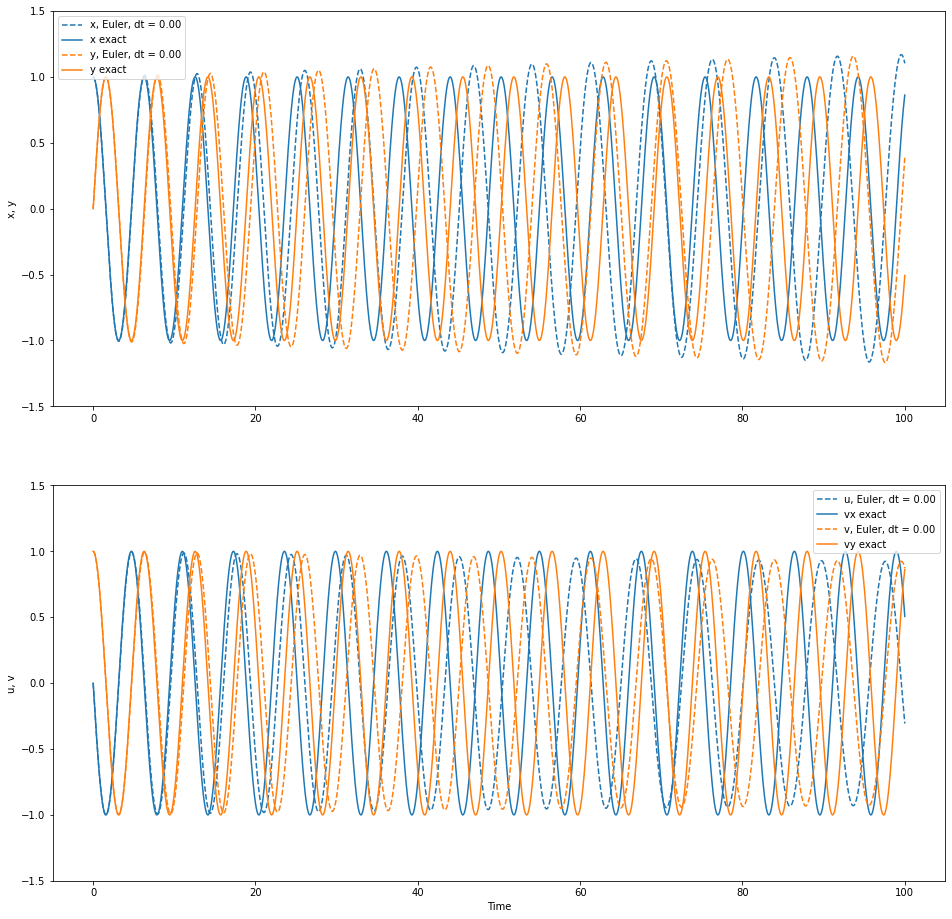

In [13]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(2,1,1)

line, = ax.plot(te, xe, '--', label="x, Euler, dt = %.2f" %dt)
ax.plot(te, exact_solution_x, '-', c=line.get_color(), label="x exact")
line, = ax.plot(te, ye, '--', label="y, Euler, dt = %.2f" %dt)
ax.plot(te, exact_solution_y, '-', c=line.get_color(), label="y exact")

ax.set_ylim([-1.5,1.5])
ax.set_ylabel("x, y")
ax.legend(loc=0, prop={'size':10})

ax = fig.add_subplot(2,1,2, sharex=ax)

line, = ax.plot(te, ue, '--', label="u, Euler, dt = %.2f" %dt)
ax.plot(te, exact_solution_u, '-', c=line.get_color(), label="vx exact")
line, = ax.plot(te, ve, '--', label="v, Euler, dt = %.2f" %dt)
ax.plot(te, exact_solution_v, '-', c=line.get_color(), label="vy exact")

ax.set_ylim([-1.5,1.5])
ax.set_ylabel("u, v")
ax.set_xlabel("Time")
ax.legend(loc=0, prop={'size':10})

This looks  bad... Let's integrate it even more 

In [14]:
Time_max = 1000
N_steps = int(Time_max/float(dt))

# Computation of the Euler's integration
te, xe, ye, ue, ve = evolve_Euler(x0, y0, u0, v0,  mu, dt, N_steps)

# Computation of the exact solution
exact_solution_x  = [position_x(x0, tt, omega) for tt in te]
exact_solution_y  = [position_y(x0, tt, omega) for tt in te]
exact_solution_u  = [velocity_x(x0, tt, omega) for tt in te]
exact_solution_v  = [velocity_y(x0, tt, omega) for tt in te]

now is time to work


In [ ]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(2,1,1)

line, = ax.plot(te, xe, '-o', label="x, Euler, dt = %.2f" %dt)
ax.plot(te, exact_solution_x, '-', c=line.get_color(), label="x exact")
line, = ax.plot(te, ye, '-o', label="y, Euler, dt = %.2f" %dt)
ax.plot(te, exact_solution_y, '-', c=line.get_color(), label="y exact")

ax.set_ylabel("x, y")
ax.legend(loc=0, prop={'size':10})

ax = fig.add_subplot(2,1,2, sharex=ax)

line, = ax.plot(te, ue, '-o', label="u, Euler, dt = %.2f" %dt)
ax.plot(te, exact_solution_u, '-', c=line.get_color(), label="vx exact")
line, = ax.plot(te, ve, '-o', label="v, Euler, dt = %.2f" %dt)
ax.plot(te, exact_solution_v, '-', c=line.get_color(), label="vy exact")

ax.set_ylabel("u, v")
ax.set_xlabel("Time")
ax.legend(loc=0, prop={'size':10})

Let's investigate the effect of the timestep

In [ ]:
Time_max = 500

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)

for dt in [0.2, 0.1, 0.001]:
    N_steps = int(Time_max/float(dt))
    # Computation of the Euler's integration
    te, xe, ye, ue, ve = evolve_Euler(x0, y0, u0, v0,  mu, dt, N_steps)
    #te, xe, ve = evolve_Euler(x0 , v0, omega, dt, int(Time_max/float(dt)))
    ax.plot(te, xe, label="dt={}".format(dt))

ax.set_ylim([-15,7.5])
ax.set_ylabel("x")
ax.set_xlabel("Time")
ax.legend(loc=0, prop={'size':10})

## Phase space

To visualize this a bit differently, let us plot the phase space: $u = f(x)$ and $v = f(y)$

In [ ]:
Time_max = 10
dt = 0.01
N_steps = int(Time_max/float(dt))
te, xe, ye, ue, ve = evolve_Euler(x0, y0, u0, v0,  mu, dt, N_steps)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)

print("now is time to work: plot phase space u vs x")
# plot calculated phase space
ax.plot(xe, ue, '--', label="Euler, dt={}".format(dt))
# plot analytical phase space
ax.plot(posi, label="Exact solution") 

ax.set_ylabel("u")
ax.set_xlabel("x")
ax.legend(loc=0, prop={'size':10})
ax.set_ylim([-1.5,1.5])
ax.set_xlim([-1.5,1.5])


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)

print("now is time to work: plot phase space v vs y")
# plot calculated phase space
ax.plot(..., '--', label="Euler, dt={}".format(dt))
# plot analytical phase space
ax.plot(..., label="Exact solution") 

ax.set_ylabel("v")
ax.set_xlabel("y")
ax.legend(loc=0, prop={'size':10})
ax.set_ylim([-1.5,1.5])
ax.set_xlim([-1.5,1.5])


There is something clearly very wrong. 

## Energy of the system: is it conserved?



The energy of the system is given by
\begin{equation}
E = E_{\rm grav} + E_{\rm kin} = - \frac{\mu}{r} + \frac{1}{2} V^2 %= -\frac{C}{r}
\end{equation}
where $r = \sqrt{x^2+y^2}$ and $V^2 = u^2 + v^2$.

We will compute $\Delta E = E(t) - E(t=0)$. If there is conservation of the energy, this should be zero.  

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)

Time_max = 1000

for dt in [0.1, 0.01, 0.001]:
    N_steps = int(Time_max/float(dt))
    # Computation of the Euler's integration
    te, xe, ye, ue, ve = evolve_Euler(x0, y0, u0, v0,  mu, dt, N_steps)
    
    print("now is time to work")
    # Compute the energy compared to the Energy at time 0 (called energy_0)
    delta_energy = np.zeros((N_steps+1))
    energy_0 = # write here
    for i in range(N_steps+1):
        delta_energy[i] = # write here

    ax.plot(te, delta_energy, label="dt={}".format(dt))
    ax.set_ylabel("$\Delta$ Energy")
    ax.set_xlabel("Time")
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.legend(loc=0, prop={'size':10})

The energy is not conserved...

## Angular momentum: is it conserved?

Another quantity which is supposed to be conserved is the total angular momentum.

The angular momentum in the heliocentric frame is given by
\begin{equation}
\mathbf{h} = \frac{m_0 m_1}{m_0 + m_1}\mathbf{r} \times \mathbf{v}
\end{equation}

For our example, the angular momentum (per unit mass) is given by
\begin{equation}
\begin{split}
\mathbf{h} &= \mathbf{r} \times \mathbf{v}\\
h_z &= x v - y u
\end{split}
\end{equation}

Let us see if this quantity is conserved. To do that let us compute $\Delta h_z = h_z(t) - h_z(t=0)$.

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1)

Time_max = 1000

for dt in [0.1, 0.01, 0.001]:
    N_steps = int(Time_max/float(dt))
    # Computation of the Euler's integration
    te, xe, ye, ue, ve = evolve_Euler(x0, y0, u0, v0,  mu, dt, N_steps)
    
    print("now is time to work")
    # Compute the angular momentum compared to the angular momentum at time 0 (called angular_momentum_0)
    delta_angular_momentum = np.zeros((N_steps+1))
    angular_momentum_0 = # write here
    for i in range(N_steps+1):
        delta_angular_momentum[i] = # write here

    ax.plot(te, delta_angular_momentum, label="dt={}".format(dt))
    ax.set_ylabel("$\Delta$ angular momentum")
    ax.set_xlabel("Time")
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.legend(loc=0, prop={'size':10})

The angular momentum is not conserved either...